In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler , OneHotEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bank.csv", delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


   ## Description:
   The data is related with direct marketing campaigns of a Portuguese banking institution.<br/> 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,<br/> 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 


   ## Input variables:

<ul> 
    <li>1 - age (numeric)</li>
    <li>2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                        "blue-collar","self-employed","retired","technician","services") </li>
    <li>3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)</li>
    <li>4 - education (categorical: "unknown","secondary","primary","tertiary")</li>
    <li>5 - default: has credit in default? (binary: "yes","no")</li>
    <li>6 - balance: average yearly balance, in euros (numeric) </li>
    <li>7 - housing: has housing loan? (binary: "yes","no")</li>
    <li>8 - loan: has personal loan? (binary: "yes","no")</li>
   <li>9 - contact: contact communication type (categorical: "unknown","telephone","cellular") </li>
   <li>10 - day: last contact day of the month (numeric)</li>
   <li>11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")</li>
   <li>12 - duration: last contact duration, in seconds (numeric) </li>
   <li>13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</li>
   <li>14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not     previously contacted)</li>
   <li>15 - previous: number of contacts performed before this campaign and for this client (numeric)</li>
   <li>16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")</li>
   <li>17 - y - has the client subscribed a term deposit? (binary: "yes","no")</li>
</ul>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
integer_columns = df.select_dtypes(include=['int64']).columns 
object_columns = df.select_dtypes(include=['object']).columns 

In [7]:
print('\nint64 columns:\n', integer_columns) 
print('\nobject columns:\n', object_columns) 


int64 columns:
 Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

object columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

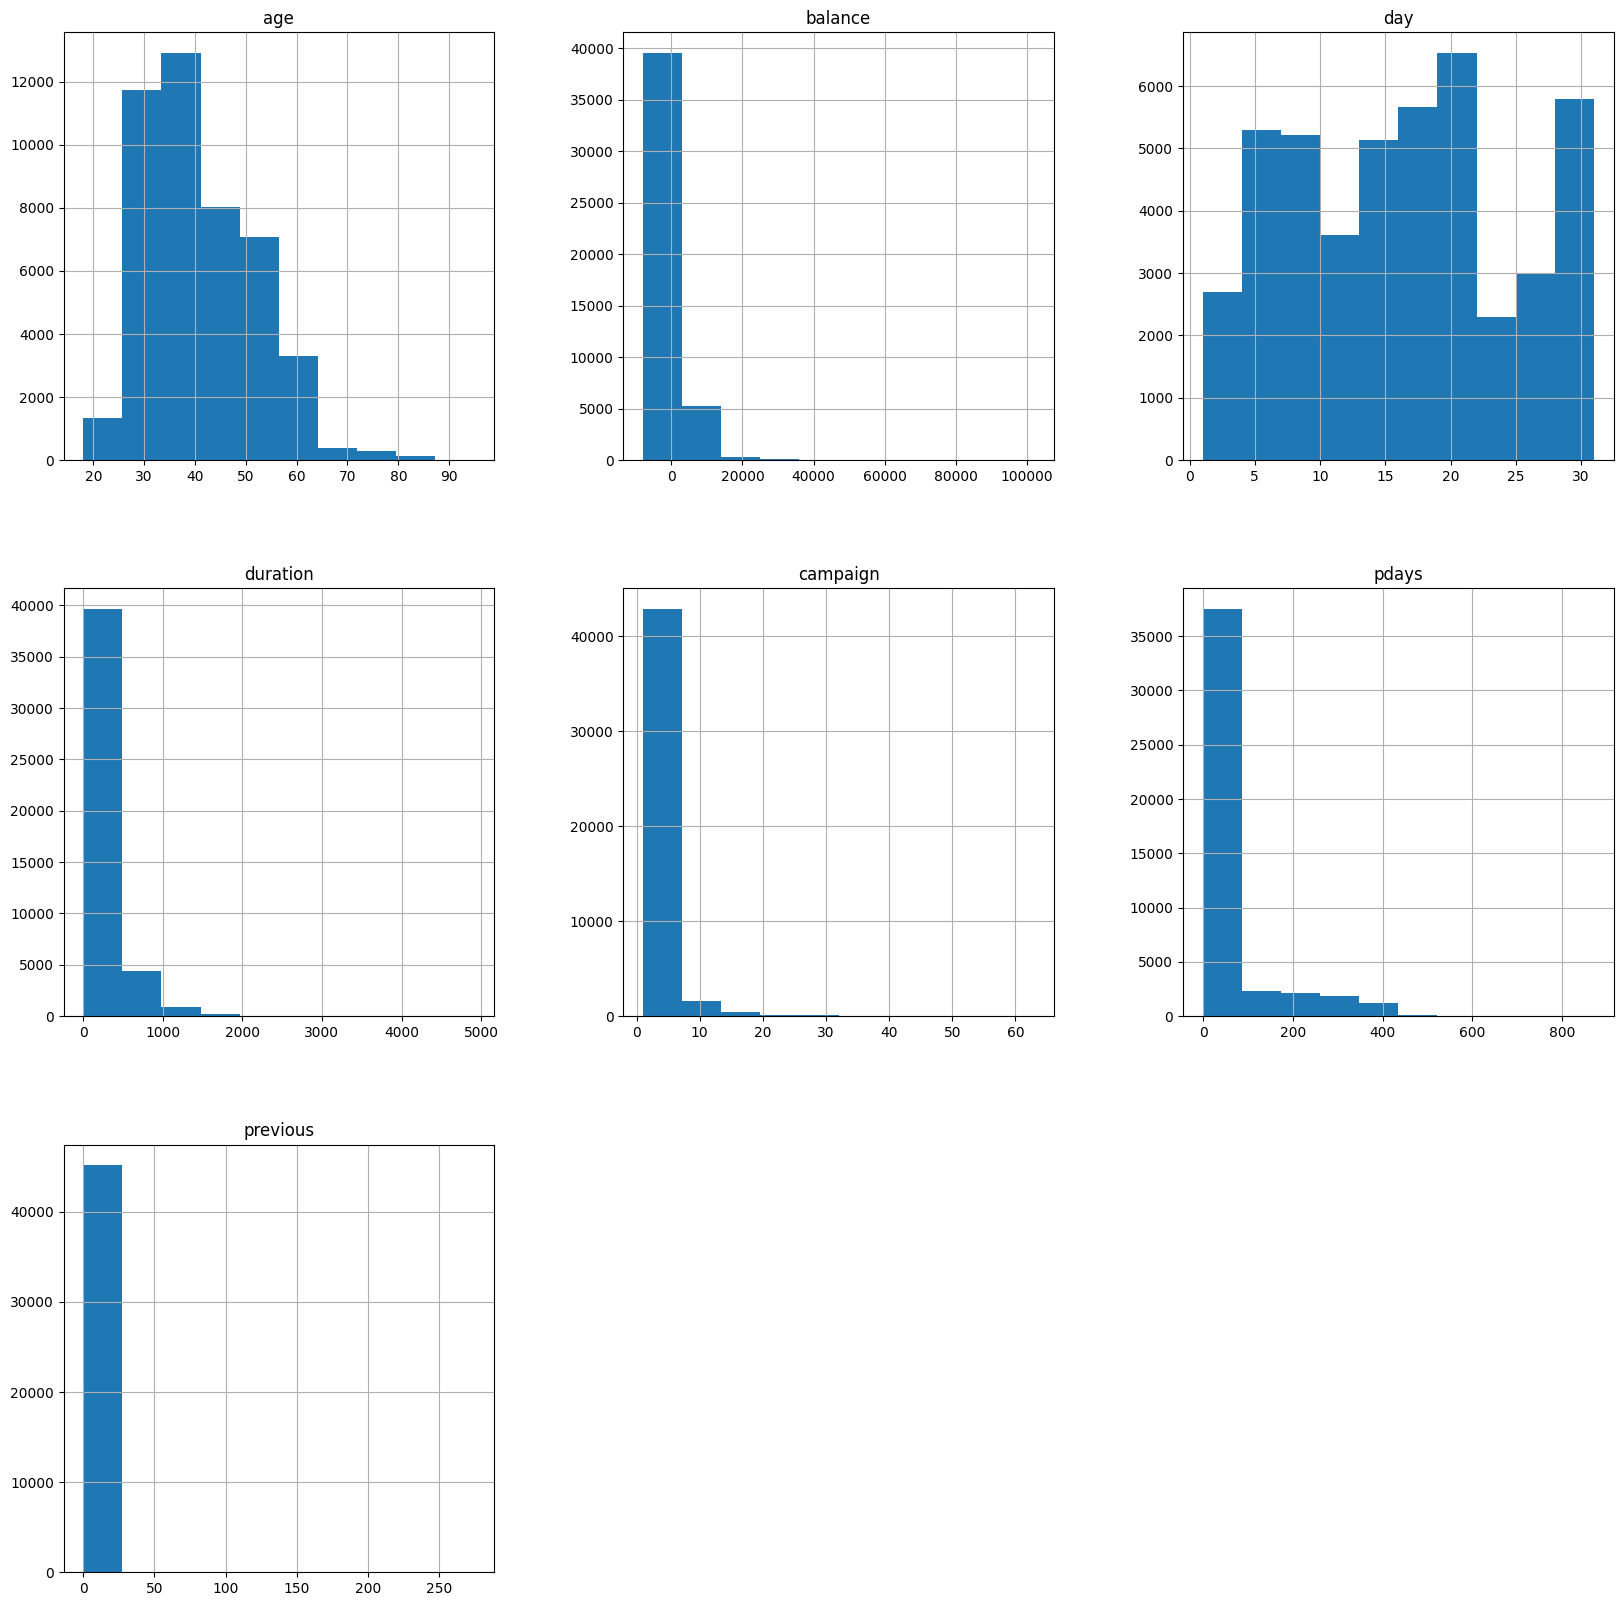

In [9]:
df[integer_columns].hist(figsize=(20,20))

<Axes: >

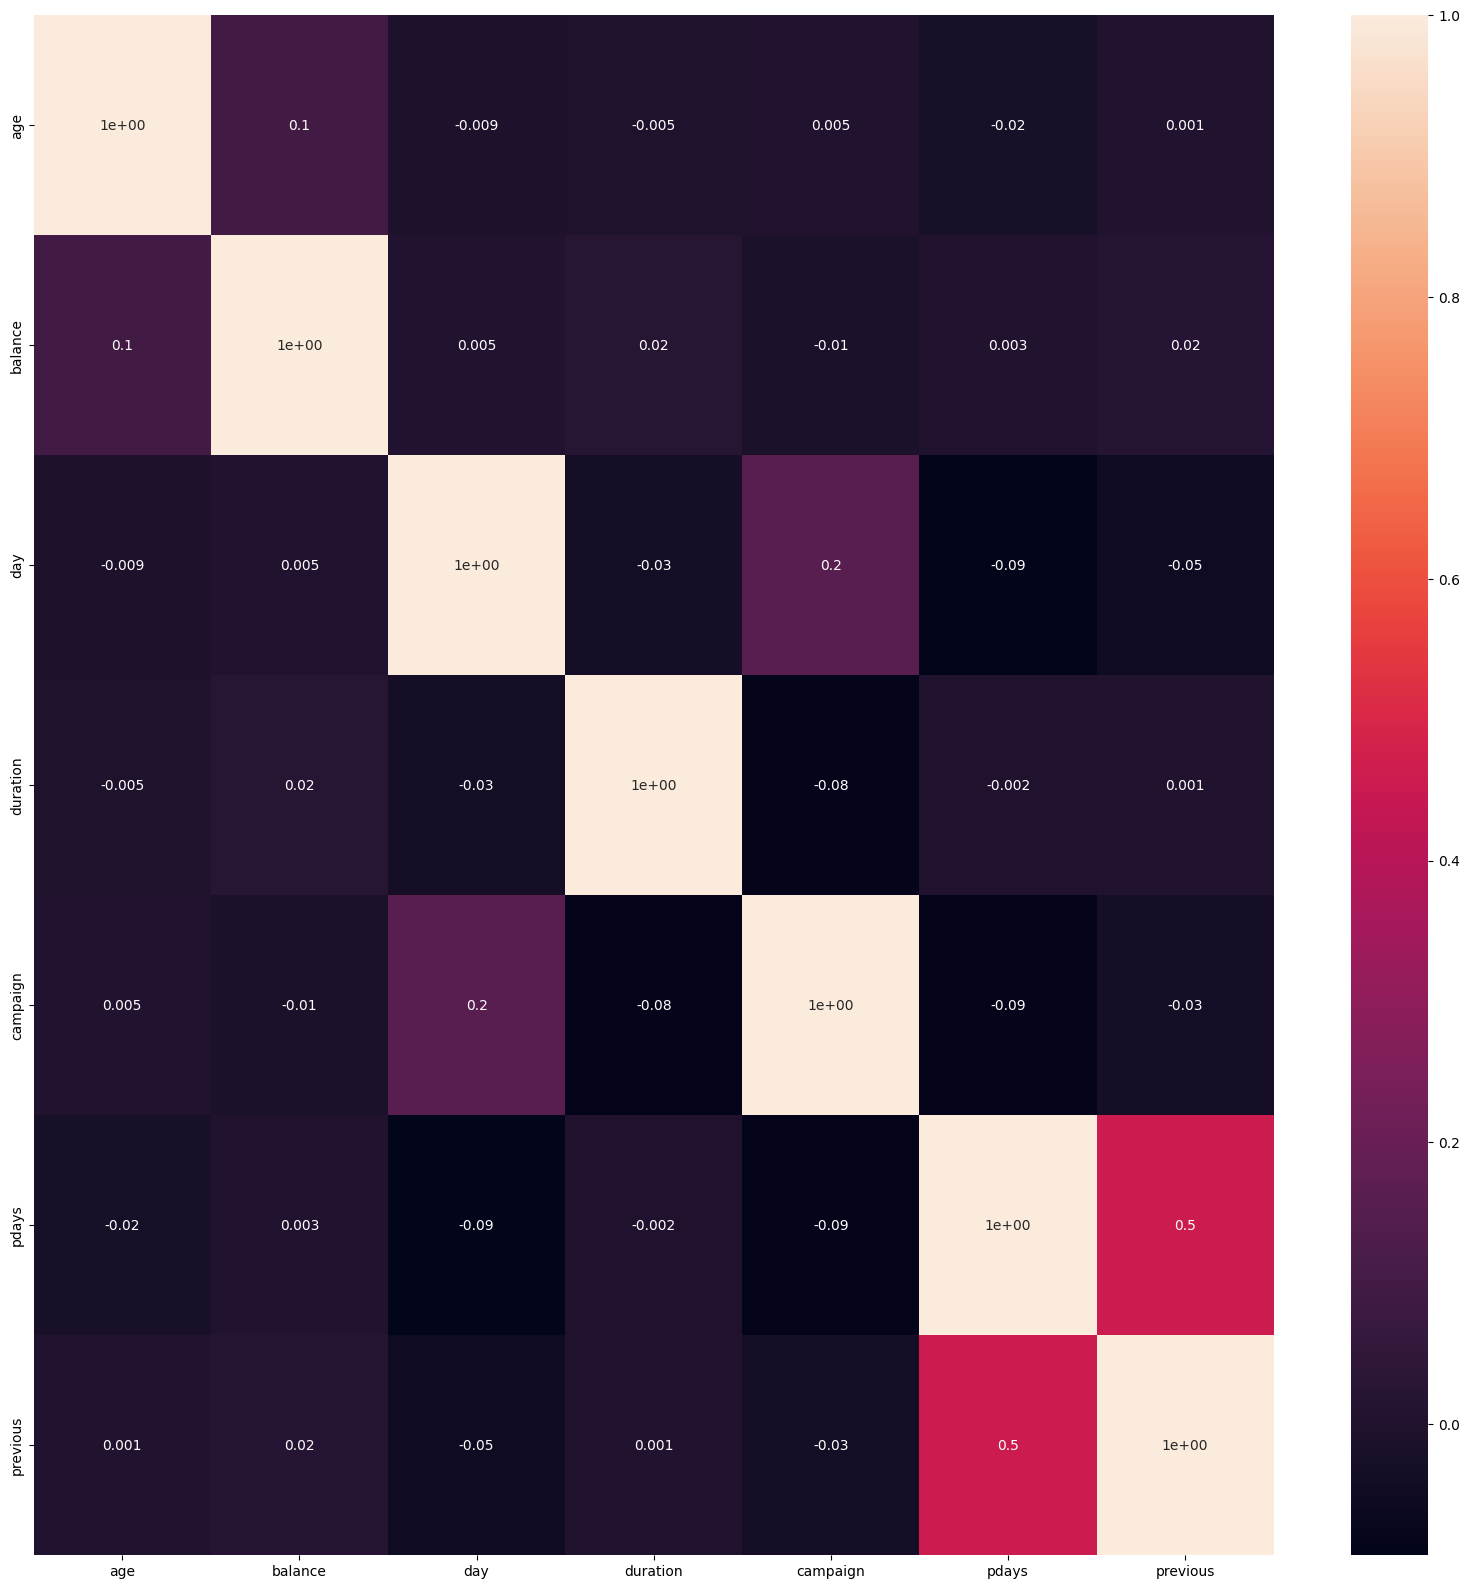

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df[integer_columns].corr() , annot=True ,fmt="0.0")

In [45]:
df["y"] = df["y"].map(lambda x:0 if x == "no" else 1)

In [46]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df[a], y = df['y'], edgecolor=edgecolor)
    plt.ylabel('y', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and y")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

In [47]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


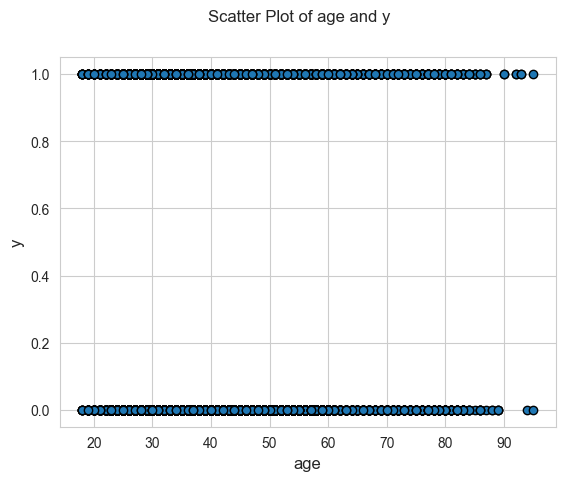

In [48]:
scatter_plot("age")

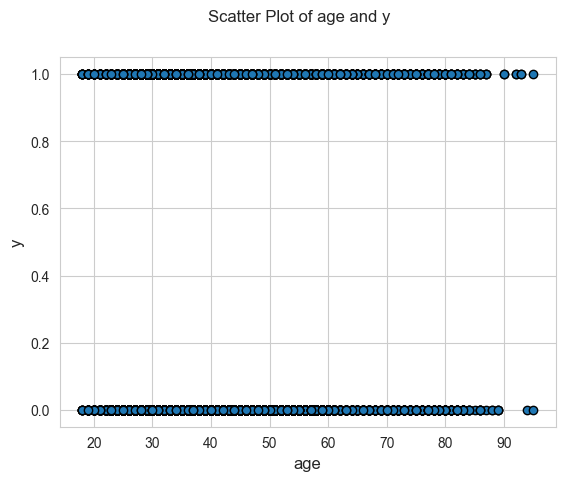

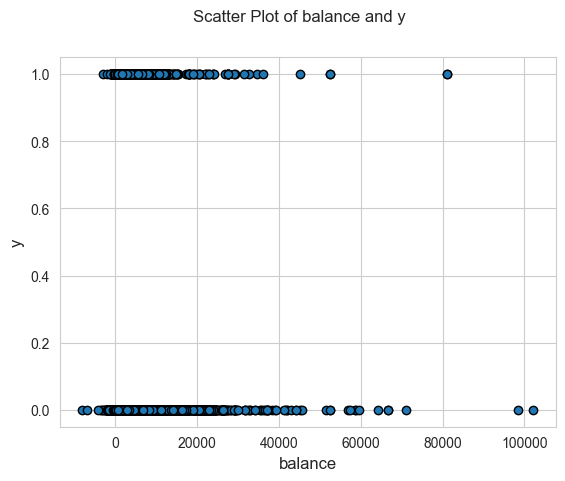

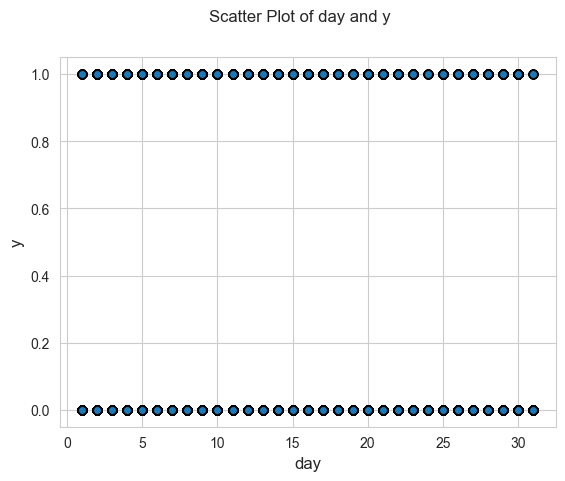

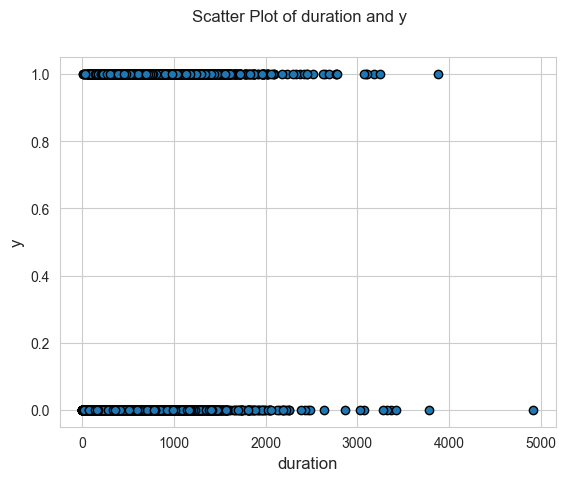

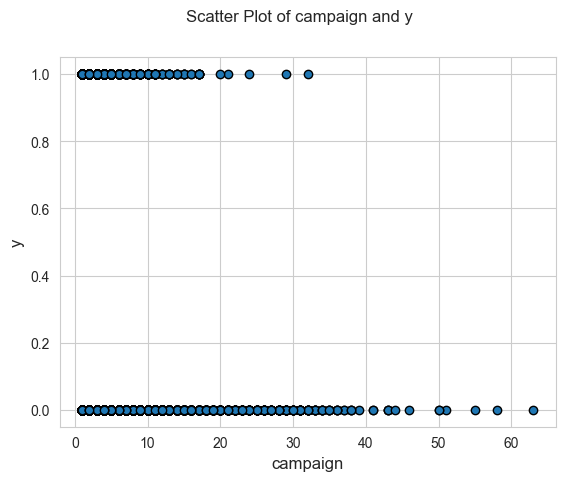

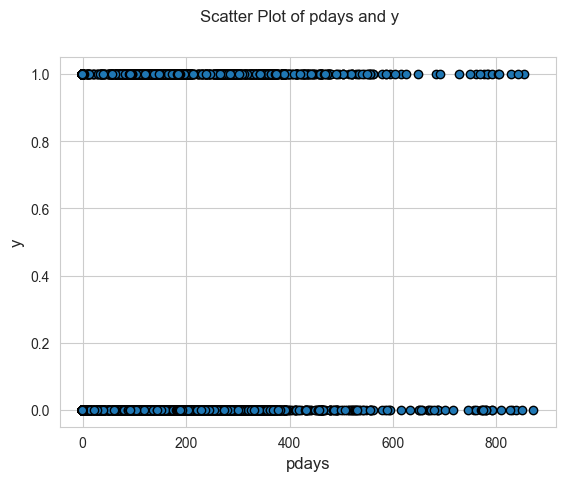

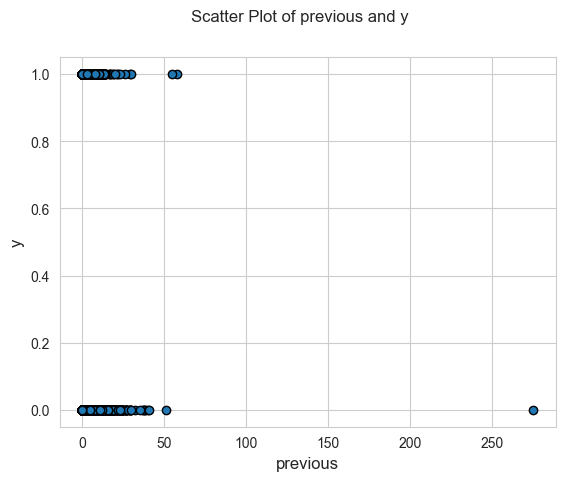

In [49]:
for col in integer_columns:
    scatter_plot(col)

# Handelling missing Data

In [50]:
def missing_data(df,n):    
    total = df.isnull().sum().sort_values(ascending=False)          
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100
    No_unique_val = df.nunique()                                   
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1, 
                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)
    
    print(missing_data.head(n))

In [51]:
missing_data(df,20)

           Total No of missing val  % of Missing val  No of unique val
age                              0               0.0                77
day                              0               0.0                31
poutcome                         0               0.0                 4
previous                         0               0.0                41
pdays                            0               0.0               559
campaign                         0               0.0                48
duration                         0               0.0              1573
month                            0               0.0                12
contact                          0               0.0                 3
job                              0               0.0                12
loan                             0               0.0                 2
housing                          0               0.0                 2
balance                          0               0.0              7168
defaul

In [52]:
X = df.drop(["y"] , axis=1)
y = df["y"]

In [53]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [54]:
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

num_attribs = X_train.select_dtypes(include=['int64' , "float"]).columns
cat_attribs = X_train.select_dtypes(include=["object"]).columns

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

In [55]:
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

# Linear Regresion

In [56]:
lin_reg = make_pipeline(preprocessing, LinearRegression())


In [57]:
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [58]:
mean_absolute_error(y_train, lin_reg.predict(X_train))

0.16291471404118021

# Randome forest

In [59]:
rfc = Pipeline([
    ("pre" , preprocessing),
    ('xgboost', RandomForestClassifier())
])

In [60]:
rfc.fit(X_train , y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('xgboost', RandomForestClassifier())])

In [61]:
mean_absolute_error(y_train, rfc.predict(X_train))

2.7648750276487504e-05

# XGBoost

In [65]:
xgb = Pipeline([
    ("pre" , preprocessing),
    ('xgboost', XGBRegressor(gamma=100))
])

In [66]:
xgb.fit(X_train , y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotE...
                              feature_types=None, gamma=100, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [67]:
mean_absolute_error(y_train, xgb.predict(X_train))

0.17895237255175703

In [70]:
param_grid = {
    'xgboost__n_estimators': [50, 100, 200],
    'xgboost__learning_rate': [0.01, 0.1, 0.2],
    'xgboost__max_depth': [3, 5, 7],
    'xgboost__subsample': [0.8, 1.0],
    'xgboost__colsample_bytree': [0.8, 1.0],
    'xgboost__gamma': [0, 1, 5],
    'xgboost__min_child_weight': [1, 5, 10],

}

grid_search = GridSearchCV(xgb, param_grid, cv=5)

In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent...
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgboost__colsample_bytree': [0.8, 1.0],
                         'xgboost__gamma': [0, 1, 5],
                         'xgboost__learning_rate': [0.01, 0.1, 0.2],
                         'xgboost__max_depth': [3, 5, 7],
                         'xgboost__min_child_weight': [1, 5, 10],
                         'xgboost__n_estimators': [50, 100, 200],
                         'xgboost__subsample': [0.8, 1.0]})

In [72]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'xgboost__colsample_bytree': 1.0, 'xgboost__gamma': 0, 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 5, 'xgboost__min_child_weight': 10, 'xgboost__n_estimators': 200, 'xgboost__subsample': 1.0}
Best cross-validation score: 0.40
